# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.4721692347203756, performing 104.8 it/sec
Step 100: Loss = 0.1495002171872135, performing 215.9 it/sec
Step 200: Loss = 0.0058613493303830, performing 308.9 it/sec
No improvement since Step 193, early stopping.
[Best]  Step 192: Loss = 0.0036145676426451
[Final] Step 242: Loss = 0.0071030571076568

predicted end states
-------------------------------------
          5th       Mean      95th
OCSL-1   1.00e-01  1.00e-01  1.00e-01
OCSL-2   8.21e-10  8.37e-10  8.52e-10
OCSL-3   1.53e-06  1.53e-06  1.53e-06
OCSL-4   1.54e-11  1.54e-11  1.54e-11
OCSL-5   5.98e-11  5.98e-11  5.98e-11
OCSL-6   1.00e-06  1.00e-06  1.00e-06
OCSL-7   1.01e-11  1.01e-11  1.01e-11
OCSL-8   9.98e-12  9.98e-12  9.98e-12
OCSL-9   4.60e-10  4.60e-10  4.60e-10
OCSL-10  3.32e-07  3.32e-07  3.32e-07


predicted conditional events
------------------------------------

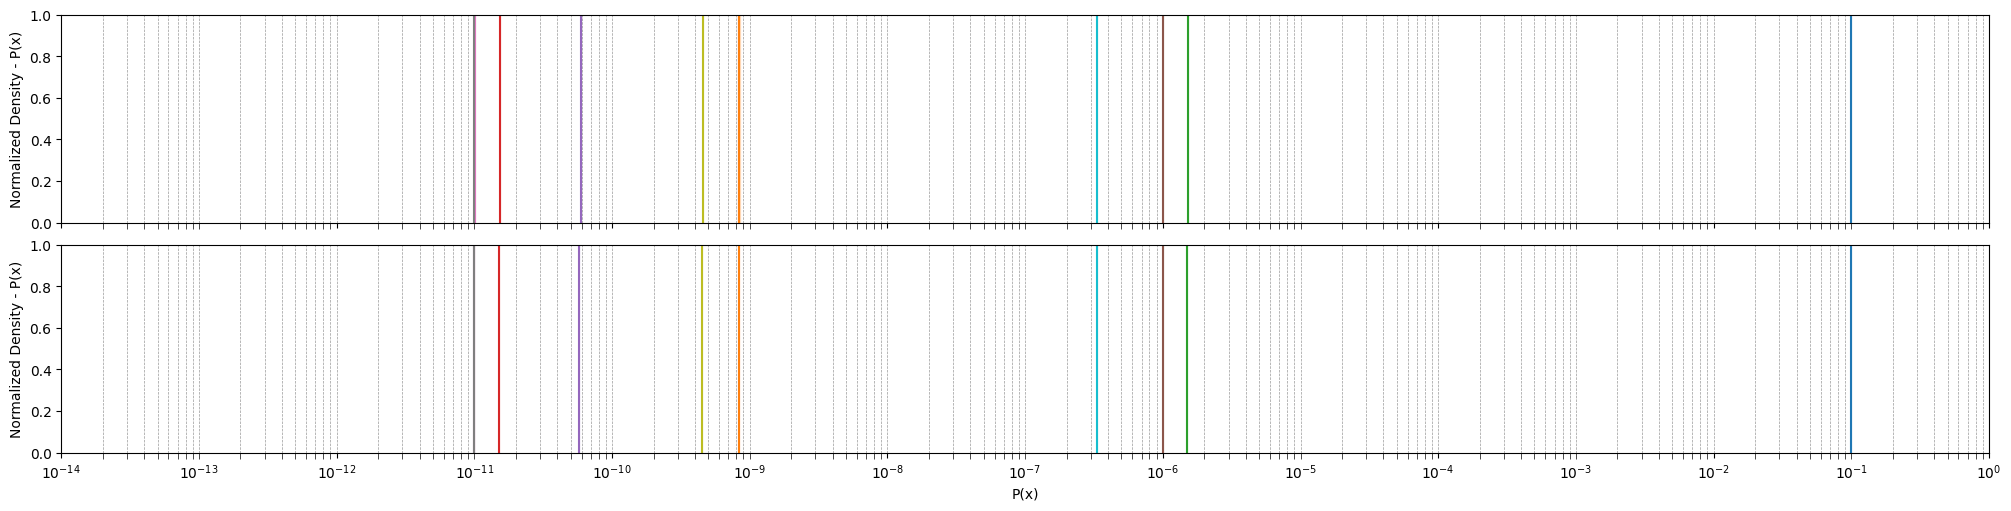

In [4]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve,
 'initiating_event_frequency': 1e-1,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['OCSL', 'RSIG', 'RROD', 'SPTR', 'BPHR', 'DHRS|BPHR', 'DHRS|~SPTR', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR', 'DHRL|~DHRS|~SPTR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'OCSL-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 0, np.nan, np.nan],
        'probability': 1e-1,
    },
    'OCSL-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 1, np.nan, np.nan],
        'probability': 8.4e-10,
    },
    'OCSL-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, np.nan, 0, np.nan],
        'probability': 1.5e-6,
    },
    'OCSL-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, np.nan, 1, np.nan],
        'probability': 1.5e-11,
    },
    'OCSL-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 5.8e-11,
    },
    'OCSL-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 0, np.nan, np.nan, 0],
        'probability': 1e-6,
    },
    'OCSL-7': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 0, np.nan, np.nan, 1],
        'probability': 1.0e-11,
    },
    'OCSL-8': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 1, np.nan, np.nan, np.nan],
        'probability': 1.0e-11,
    },

    'OCSL-9': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 4.5e-10,
    },

    'OCSL-10': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 3.3e-7,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)